# Exploratory data analysis on a scoring students test dataset

#### In this EDA we're going to explore and dive deep into the performance of the students who have partecipated at the test by looking into all the information available and provided by our dataset in order to find out meaningful insights


## Let's import the libraries that we need to perform this analysis

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [37]:
data= pd.read_csv(r"C:\Users\olagu\OneDrive\Documents\datasets\StudentsPerformance.csv") #loading the dataset
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [38]:
data.info() #checking the entity of the dataset and whether there are missing values or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
data.isna().sum() #checking the presence of missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [65]:
data.duplicated().sum() # checking whether there are some duplicates

0

In [40]:
data.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"education",
                                    "test preparation course":"preparetion test"},inplace=True)
data

,gender,ethnicity,education,lunch,preparetion test,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Let's create a new column that represents the total of all the tests

In [41]:
data["total_score"]=data["math score"]+ data["reading score"]+ data["writing score"]
data

,gender,ethnicity,education,lunch,preparetion test,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [25]:
data.describe()[["math score","reading score","writing score","total_score"]].T #getting some statistical insights about some columns

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0
total_score,1000.0,203.312,42.771978,27.0,175.00,205.0,233.0,300.0


## What's the percentage of students per each type of ethnicity?

<AxesSubplot:title={'center':'percentage of students per ethnicity'}, ylabel='ethnicity'>

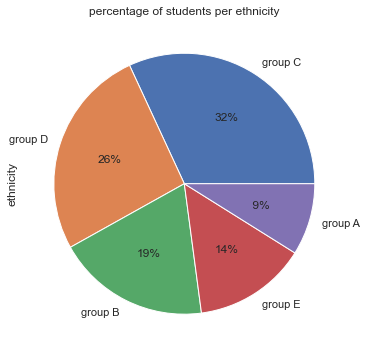

In [338]:
data["ethnicity"].value_counts(normalize=True,ascending=False).plot(kind="pie",autopct='%2.0f%%',
                                                                   title="percentage of students per ethnicity",
                                                                   figsize=(12,6))

## How many students have a master's degree and a total score above the average?

In [333]:
criteria = data[(data["total_score"] > np.mean(data["total_score"])) & (data["education"] == "master's degree")]
criteria
master = data.loc[criteria.index,["gender","education","total_score"]]
master.head()

,gender,education,total_score
2,female,master's degree,278
25,male,master's degree,219
29,female,master's degree,207
106,female,master's degree,287
128,male,master's degree,238


In [334]:
num_rows= criteria.shape[0]
print(f"the number of students with a master degree and a total score above average is:{num_rows}")

the number of students with a master degree and a total score above average is:39


## What's the percentage of male students with zero preparation and a total score below the average?

In [185]:
new_criteria=data[(data["gender"]=="male") & (data["preparetion test"] =="none") & (data["total_score"]< np.mean(data["total_score"]))]
new_criteria

,gender,ethnicity,education,lunch,preparetion test,math score,reading score,writing score,total_score
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
7,male,group B,some college,free/reduced,none,40,43,39,122
10,male,group C,associate's degree,standard,none,58,54,52,164
11,male,group D,associate's degree,standard,none,40,52,43,135
20,male,group D,high school,standard,none,66,69,63,198
...,...,...,...,...,...,...,...,...,...
967,male,group C,some college,standard,none,63,63,60,186
977,male,group C,associate's degree,standard,none,62,65,58,185
985,male,group A,high school,standard,none,57,51,54,162
994,male,group A,high school,standard,none,63,63,62,188


In [326]:
percentage = new_criteria.shape[0] /data["total_score"].shape[0]*100
print(f"the percentage of male students with zero preparation and total score below the mean is:{percentage}")

the percentage of male students with zero preparation and total score below the mean is:18.8


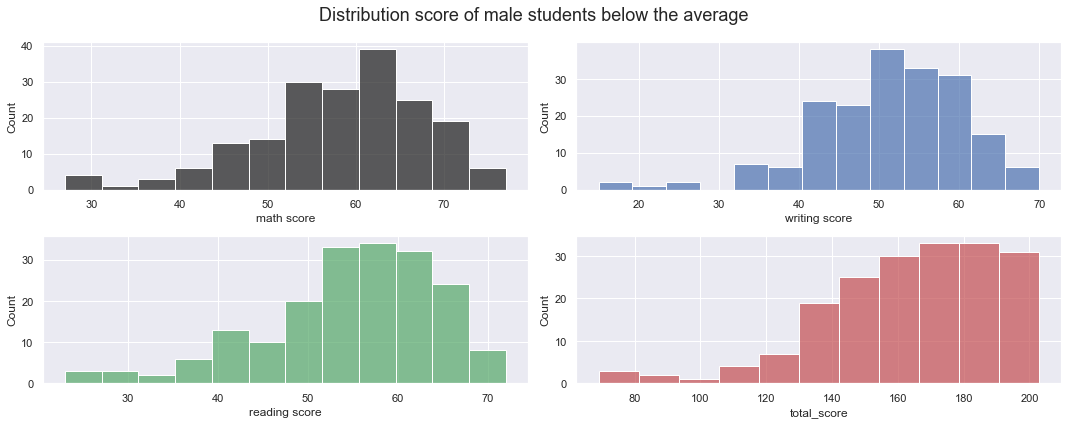

In [323]:
fig,ax=plt.subplots(2,2 ,figsize=(15,6))
sns.histplot(data=new_criteria["math score"],color="k",label="math_score",ax=ax[0,0],alpha=0.7)
sns.histplot(data=new_criteria["reading score"],color="g",label="reading score",ax=ax[1,0],alpha=0.7)
sns.histplot(data=new_criteria["writing score"],color="b",label="writing score",ax=ax[0,1],alpha=0.7)
sns.histplot(data=new_criteria["total_score"],color="r",label="total_score",ax=ax[1,1],alpha=0.7)
fig.suptitle("Distribution score of male students below the average",fontsize=18)
plt.tight_layout()
plt.show()


## What's the number of  female and male students with a master degree and a total score above the average?

In [84]:
criteria.groupby("gender")["total_score"].count()
 

gender
female    21
male      18
Name: total_score, dtype: int64

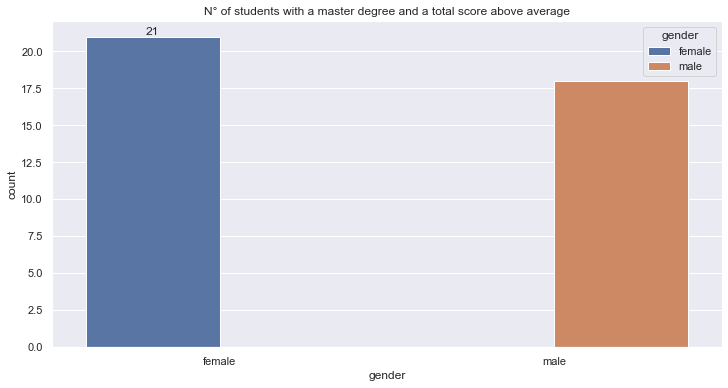

In [272]:
plt.figure(figsize=(12,6))
above_average = sns.countplot(data= criteria, x="gender",hue="gender")
above_average.set(title="N° of students with a master degree and a total score above average")
above_average.bar_label(above_average.containers[0])
sns.set_palette("deep")
sns.set_style("darkgrid")
plt.show()

## what's the percentage of students per type of education?

In [312]:
edu_dist = data["education"].value_counts(normalize=True,ascending=False)
edu_dist

some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: education, dtype: float64

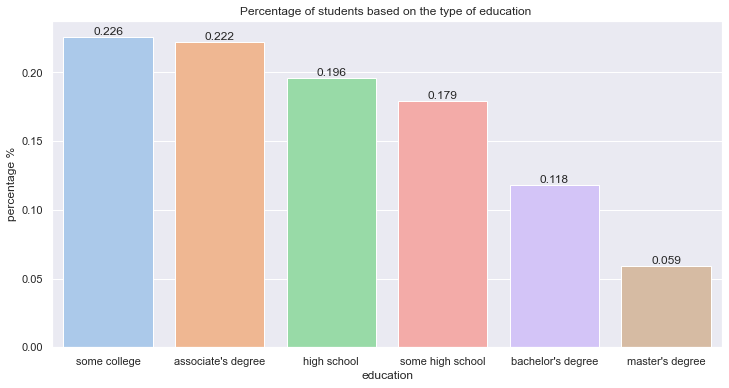

In [318]:
plt.figure(figsize=(12,6))
dist=sns.barplot(x=edu_dist.index, y=edu_dist.values,palette = "pastel")
dist.set(title="Percentage of students based on the type of education ",ylabel="percentage %",xlabel="education")
dist.bar_label(dist.containers[0])
plt.show()

## Distribution of the total score based on gender in percentage (%)

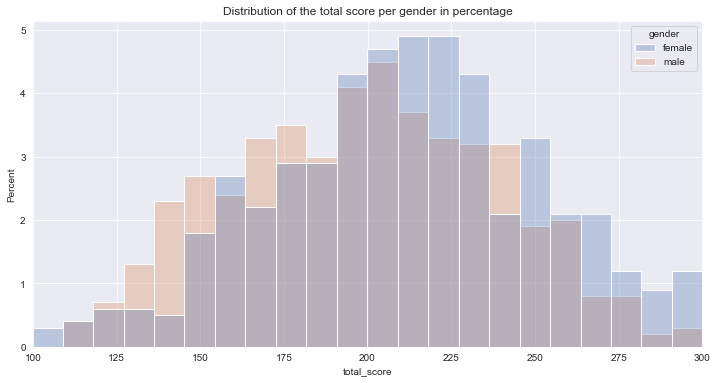

In [208]:
plt.figure(figsize=(12,6))
ax=sns.histplot(data,x="total_score",bins=30,stat="percent",hue="gender",alpha=0.3)
ax.set(title="Distribution of the total score per gender in percentage",xlim=(100,300))
plt.show()

## Average total score of students with completed and none preparetion broken down into education and gender 

In [138]:
data.pivot_table(index=["education","gender"],columns="preparetion test",values="total_score",aggfunc=np.mean)

preparetion test            completed        none
education          gender                        
associate's degree female  231.500000  203.081081
                   male    217.800000  195.000000
bachelor's degree  female  234.681818  218.292683
                   male    223.250000  193.225806
high school        female  205.517241  189.215385
                   male    195.925926  180.693333
master's degree    female  233.928571  212.681818
                   male    217.333333  221.705882
some college       female  225.690476  206.000000
                   male    221.885714  185.287671
some high school   female  214.257143  185.714286
                   male    202.809524  185.782609

## What's the average total score per education?

In [273]:
edu_score= data.groupby("education")["total_score"].mean()
edu_score

education
associate's degree    208.707207
bachelor's degree     215.771186
high school           189.290816
master's degree       220.796610
some college          205.429204
some high school      195.324022
Name: total_score, dtype: float64

[Text(0, 0, '208.707'),
 Text(0, 0, '215.771'),
 Text(0, 0, '189.291'),
 Text(0, 0, '220.797'),
 Text(0, 0, '205.429'),
 Text(0, 0, '195.324')]

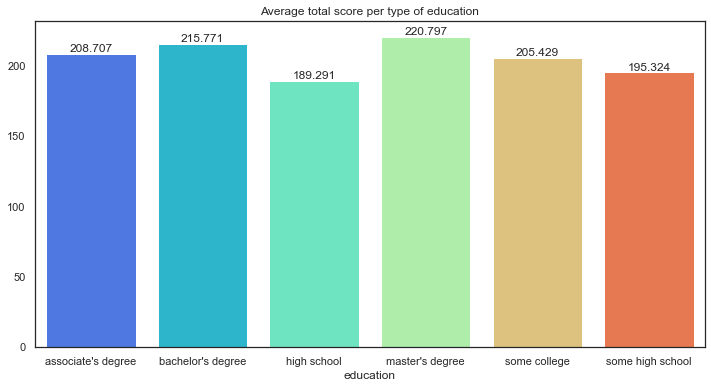

In [269]:
plt.figure(figsize=(12,6))
edu=sns.barplot(x=edu_score.index, y=edu_score.values,palette = "rainbow")
edu.set(title="Average total score per type of education")
edu.bar_label(edu.containers[0])


In [150]:
above_mean = data[data["total_score"]> np.mean(data["total_score"])]
data.loc[above_mean.index,:]

,gender,ethnicity,education,lunch,preparetion test,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
4,male,group C,some college,standard,none,76,78,75,229
5,female,group B,associate's degree,standard,none,71,83,78,232
...,...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76,207
993,female,group D,bachelor's degree,free/reduced,none,62,72,74,208
995,female,group E,master's degree,standard,completed,88,99,95,282
998,female,group D,some college,standard,completed,68,78,77,223


## What's the percentage of male and female students for each type of education?

In [302]:
edu_sex = above_mean.groupby("education")["gender"].value_counts(normalize=True,ascending=False)


education           gender
associate's degree  female    0.554688
                    male      0.445312
bachelor's degree   female    0.616438
                    male      0.383562
high school         female    0.506329
                    male      0.493671
master's degree     female    0.538462
                    male      0.461538
some college        female    0.614754
                    male      0.385246
some high school    female    0.564706
                    male      0.435294
Name: gender, dtype: float64

## What's the average total score per type of education broken down into gender?

<Figure size 1080x576 with 0 Axes>

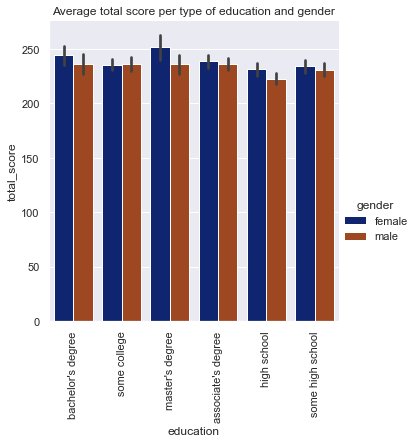

In [340]:
plt.figure(figsize=(15,8))
above_average_edu_sex = sns.catplot(kind="bar",data=above_mean, x="education",y="total_score",hue="gender")
above_average_edu_sex.set(title="Average total score per type of education and gender")
plt.xticks(rotation=90)
sns.set_palette("dark")
sns.set_style("darkgrid")
plt.show()

## Correlation between total score and the other tests

In [168]:
data.corr()["total_score"] # let's check the correaltion of total score with the other numerical columns of the dataset

math score       0.918746
reading score    0.970331
writing score    0.965667
total_score      1.000000
Name: total_score, dtype: float64

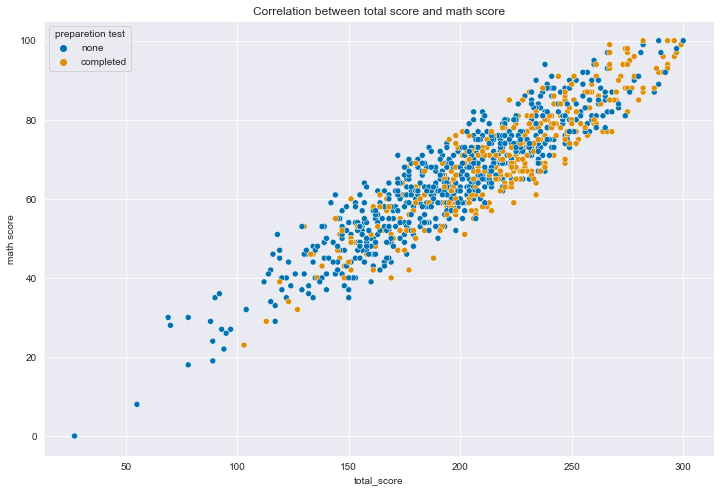

In [170]:
plt.figure(figsize=(12,8))
tot_score_corr=sns.scatterplot(data=data,x="total_score",y="math score",hue="preparetion test",palette="colorblind")
tot_score_corr.set(title="Correlation between total score and math score")
plt.show()

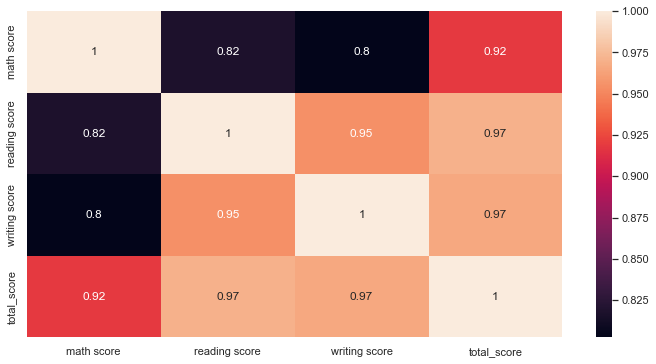

In [245]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)
plt.show()


## Labeling the total score for each quartile and seeing the percentage for each of them

In [224]:
bins= data["total_score"].quantile([0,0.25,0.5,0.75,1])
bins

0.00     27.0
0.25    175.0
0.50    205.0
0.75    233.0
1.00    300.0
Name: total_score, dtype: float64

In [308]:
pd.cut(data["total_score"],bins=bins,labels=["bad","below average","above average","very good"]).value_counts(normalize=True)


bad              0.255255
above average    0.249249
very good        0.249249
below average    0.246246
Name: total_score, dtype: float64

<AxesSubplot:>

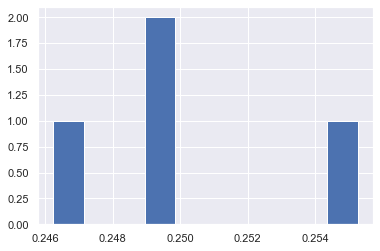